In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
edges = pd.read_csv('./Data/bible.edges', sep=' ', header=None)
edges

,0,1,2
0,1,2,100
1,3,2,78
2,4,1,73
3,4,5,67
4,1,6,67
...,...,...,...
9126,558,111,1
9127,1042,424,1
9128,130,6,1
9129,280,414,1


In [3]:
graph = nx.from_pandas_edgelist(edges, 0, 1)
print(nx.info(graph))

Graph with 1773 nodes and 9131 edges


C:\Users\Asus\AppData\Local\Temp\ipykernel_15080\2160582480.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


# Part A

In [4]:
matrix = nx.to_numpy_matrix(graph)
matrix

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
def degree_Mat(matrix):
   degree = np.zeros((matrix.shape[0], matrix.shape[0]))
   for i in range(matrix.shape[0]):
       degree[i][i] = np.sum(matrix[i])
   print('matrix of degrees is : \n',degree) 
   return degree


def laplacian(matrix):
    degree = degree_Mat(matrix)
    lap = degree - matrix
    print('\nlaplacian matrix is : \n',lap)
    return degree - matrix

laplacian = laplacian(matrix)

print("laplacian shape is  : ",laplacian.shape)



matrix of degrees is : 
 [[364.   0.   0. ...   0.   0.   0.]
 [  0. 254.   0. ...   0.   0.   0.]
 [  0.   0. 202. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   2.   0.   0.]
 [  0.   0.   0. ...   0.   4.   0.]
 [  0.   0.   0. ...   0.   0.   2.]]

laplacian matrix is : 
 [[364.  -1.  -1. ...   0.   0.   0.]
 [ -1. 254.  -1. ...   0.   0.   0.]
 [ -1.  -1. 202. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   2.   0.   0.]
 [  0.   0.   0. ...   0.   4.   0.]
 [  0.   0.   0. ...   0.   0.   2.]]
laplacian shape is  :  (1773, 1773)


# Part B

In [6]:
#sorted eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(laplacian)
eigenvalues,eigenvectors


(array([365.02751806, 255.06394602, 222.07428469, ...,   3.        ,
          3.        ,   3.        ]),
 matrix([[ 9.98546027e-01,  2.99922860e-03,  2.96473093e-03, ...,
          -5.79989067e-17, -5.24863981e-17, -3.35824805e-17],
         [-4.93642513e-03,  9.97615066e-01,  1.62543265e-02, ...,
          -1.16208354e-17,  1.61031676e-17,  1.39570251e-17],
         [-4.04574543e-03, -1.05113376e-02, -3.47483019e-02, ...,
          -2.50015753e-19,  3.11354216e-18, -3.64112339e-18],
         ...,
         [-2.30515516e-08, -7.05962420e-08,  1.55249574e-09, ...,
          -4.24591427e-02,  2.30231800e-03, -7.43936244e-03],
         [ 1.71219811e-05, -2.18184319e-06,  5.05846856e-05, ...,
          -4.06410536e-16, -4.29922954e-16, -7.87057292e-17],
         [ 7.61276370e-06,  1.56394236e-05, -6.39479041e-07, ...,
           2.53024762e-16,  3.21964380e-16,  2.00610573e-16]]))

In [7]:
#sorting eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:,idx]

print('sorted eigenvalues are : \n',eigenvalues_sorted)
print('\nsorted eigenvectors are : \n',eigenvectors_sorted)

sorted eigenvalues are : 
 [-4.46139904e-14 -8.90326803e-15 -6.47322745e-15 ...  2.22074285e+02
  2.55063946e+02  3.65027518e+02]

sorted eigenvectors are : 
 [[ 2.42037824e-02  2.73271444e-21 -6.72048445e-18 ...  2.96473093e-03
   2.99922860e-03  9.98546027e-01]
 [ 2.42037824e-02  1.79210931e-17 -5.75859294e-18 ...  1.62543265e-02
   9.97615066e-01 -4.93642513e-03]
 [ 2.42037824e-02 -1.62052269e-17 -1.02230029e-17 ... -3.47483019e-02
  -1.05113376e-02 -4.04574543e-03]
 ...
 [ 2.42037824e-02  4.51310128e-17 -1.77730863e-17 ...  1.55249574e-09
  -7.05962420e-08 -2.30515516e-08]
 [ 2.42037824e-02  2.09743367e-16  1.10346001e-16 ...  5.05846856e-05
  -2.18184319e-06  1.71219811e-05]
 [ 2.42037824e-02 -6.62863372e-16  1.92721272e-17 ... -6.39479041e-07
   1.56394236e-05  7.61276370e-06]]


In [23]:
print('second smallest eigenvalue is : ',eigenvalues_sorted[1])
print('second smallest eigenvector is : \n',eigenvectors_sorted[:,1])

vector2 = np.squeeze(np.asarray(eigenvectors_sorted[:,1]))
vector2_real = [np.real(a) for a in vector2]

second smallest eigenvalue is :  -8.903268033317957e-15
second smallest eigenvector is : 
 [[ 2.73271444e-21]
 [ 1.79210931e-17]
 [-1.62052269e-17]
 ...
 [ 4.51310128e-17]
 [ 2.09743367e-16]
 [-6.62863372e-16]]


# Part C

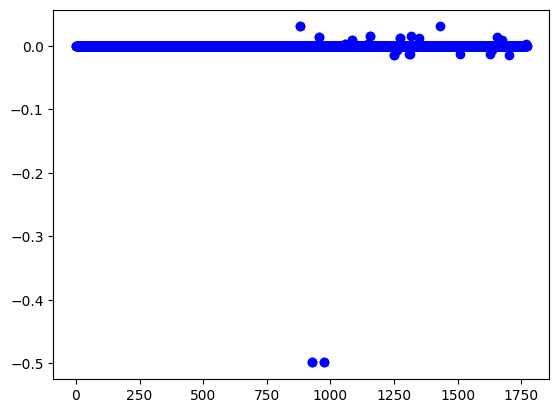

In [9]:
import matplotlib.pyplot as plt
plt.scatter(range(graph.number_of_nodes()),vector2_real,c='b')

In [10]:
# #normalized eigenvalues and eigenvectors   
# eigenvalues_norm = eigenvalues/np.sum(eigenvalues)
# eigenvectors_norm = eigenvectors/np.sum(eigenvectors)
# print('\nNormalized Eigenvalues are : \n',eigenvalues_norm)
# print('\nNormalized Eigenvectors are : \n',eigenvectors_norm)


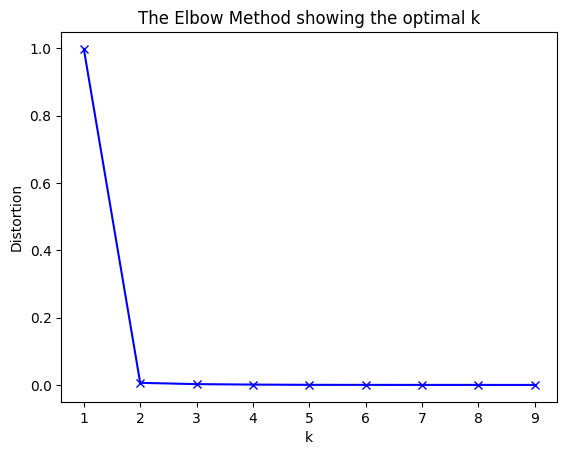

In [11]:
#kmeans clustering on eigenvalues, distotion, plotting
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np.array((vector2_real)).reshape(-1,1))
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


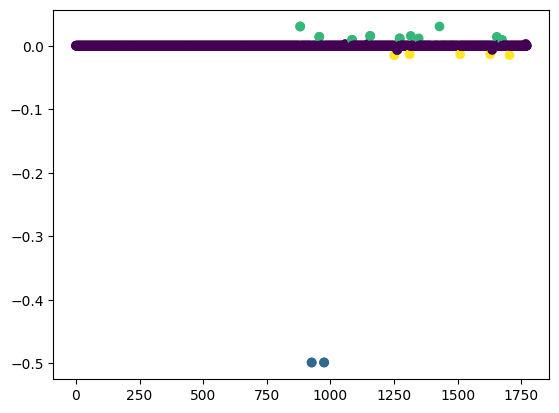

 k is 4 :
cluster centers are :  [[-6.81182728e-06]
 [-4.98438366e-01]
 [ 1.60824561e-02]
 [-1.39456314e-02]]
cluster labels are :  [0 0 0 ... 0 0 0]
cluster labels lengh is :  (1773,)


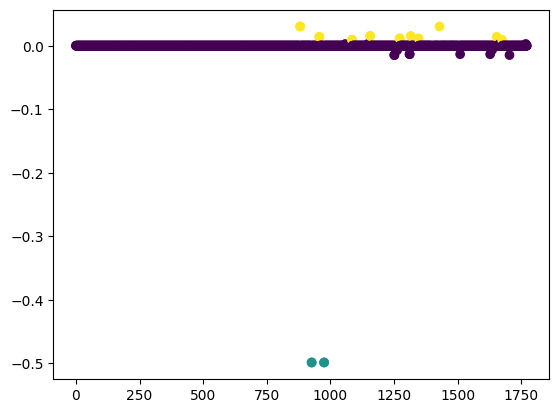

 k is 3 :
cluster centers are :  [[-6.24399554e-05]
 [-4.98438366e-01]
 [ 1.60824561e-02]]
cluster labels are :  [0 0 0 ... 0 0 0]
cluster labels lengh is :  (1773,)


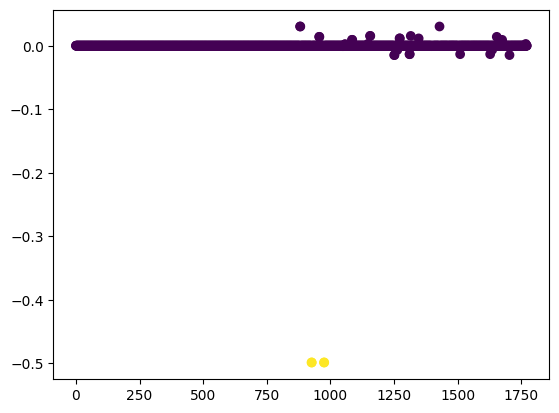

 k is 2 :
cluster centers are :  [[ 7.44585412e-05]
 [-4.98438366e-01]]
cluster labels are :  [0 0 0 ... 0 0 0]
cluster labels lengh is :  (1773,)


In [18]:
#kmeans clustering k=3 and plotting
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(np.array(vector2_real).reshape(-1,1))
labels_4 = kmeans_4.labels_
plt.scatter(range(graph.number_of_nodes()),vector2_real,c=labels_4, cmap='viridis')
plt.show()

print(' k is 4 :')
print('cluster centers are : ',kmeans_4.cluster_centers_)
print('cluster labels are : ',labels_4)
print('cluster labels lengh is : ',labels_4.shape)

kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(np.array(vector2_real).reshape(-1,1))
labels_3 = kmeans_3.labels_
plt.scatter(range(graph.number_of_nodes()),vector2_real,c=labels_3, cmap='viridis')
plt.show()

print(' k is 3 :')
print('cluster centers are : ',kmeans_3.cluster_centers_)
print('cluster labels are : ',labels_3)
print('cluster labels lengh is : ',labels_3.shape)

kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(np.array(vector2_real).reshape(-1,1))
labels_2 = kmeans_2.labels_
plt.scatter(range(graph.number_of_nodes()),vector2_real,c=labels_2, cmap='viridis')
plt.show()

print(' k is 2 :')
print('cluster centers are : ',kmeans_2.cluster_centers_)
print('cluster labels are : ',labels_2)
print('cluster labels lengh is : ',labels_2.shape)



# Part D

In [21]:
cluster1_4 = (np.where(kmeans_4.labels_==1)[0])
cluster2_4 = (np.where(kmeans_4.labels_==2)[0])
cluster3_4 = (np.where(kmeans_4.labels_==3)[0])
cluster4_4 = (np.where(kmeans_4.labels_==0)[0])
list_of_clusters_4 = [cluster1_4,cluster2_4,cluster3_4,cluster4_4]

cluster1_3 = (np.where(kmeans_3.labels_==1)[0])
cluster2_3 = (np.where(kmeans_3.labels_==2)[0]) 
cluster3_3 = (np.where(kmeans_3.labels_==0)[0])
list_of_clusters_3 = [cluster1_3,cluster2_3,cluster3_3]

cluster1_2 = (np.where(kmeans_2.labels_==1)[0])
cluster2_2 = (np.where(kmeans_2.labels_==0)[0])
list_of_clusters_2 = [cluster1_2,cluster2_2]



In [19]:
#mincut algorithm with clustering
def mincut(matrix, labels):
    mincut = 0
    for i in range(len(labels)-1):
        for j in range(i+1, len(labels)-1):
            if labels[i] != labels[j]:
                mincut +=  matrix[i , j]
    return mincut

mincut_4 = mincut(matrix, labels_4)
print('mincut for kmeans with k=4 is : ',mincut_4)

mincut_3 = mincut(matrix, labels_3)
print('mincut for kmeans with k=3 is : ',mincut_3)

mincut_2 = mincut(matrix, labels_2)
print('mincut for kmeans with k=2 is : ',mincut_2)


mincut for kmeans with k=4 is :  0.0
mincut for kmeans with k=3 is :  0.0
mincut for kmeans with k=2 is :  0.0


In [22]:
m = graph.number_of_edges()

nodes = list(graph.nodes())

def modularity(clusters,m,G,nodes):
  sums = []
  for cluster in clusters:
    sum = 0
    for i in cluster:
      for j in cluster:
        t = G.degree[nodes[i]]*G.degree[nodes[j]]/(2*m)
        if G.has_edge(nodes[i],nodes[j]):
          a = 1
        else:
          a = 0
        sum+= a - t
    sums.append(sum)
  return(np.sum(sums)/(2*m))

print ('modularity for k=4 is : ',modularity(list_of_clusters_4,m,graph,nodes))
print ('modularity for k=3 is : ',modularity(list_of_clusters_3,m,graph,nodes))
print ('modularity for k=2 is : ',modularity(list_of_clusters_2,m,graph,nodes))

modularity for k=4 is :  0.006556125270962652
modularity for k=3 is :  0.0045912954819048325
modularity for k=2 is :  0.001313340792245858
